In [10]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import os
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)  # Convert DataFrame to NumPy array

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal = np.concatenate(normal_data, axis=0)
add_weight = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant = np.concatenate(PressureGain_constant_data, axis=0)


In [3]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal_test = np.concatenate(normal_data, axis=0)
add_weight_test = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight_test = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad_test = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant_test = np.concatenate(PressureGain_constant_data, axis=0)


In [4]:
# Create labels for each training class
y_normal = np.zeros(len(normal))
y_add_weight = np.ones(len(add_weight))
y_slight = np.full(len(PropellerDamage_slight), 2)
y_bad = np.full(len(PropellerDamage_bad), 3)
y_pressure = np.full(len(PressureGain_constant), 4)

# Create labels for each test class
y_normal_test = np.zeros(len(normal_test))
y_add_weight_test = np.ones(len(add_weight_test))
y_slight_test = np.full(len(PropellerDamage_slight_test), 2)
y_bad_test = np.full(len(PropellerDamage_bad_test), 3)
y_pressure_test = np.full(len(PressureGain_constant_test), 4)

# Concatenate all classes into final training and testing sets
X_train = np.concatenate([normal, add_weight, PropellerDamage_slight, PropellerDamage_bad, PressureGain_constant])
X_test = np.concatenate([normal_test, add_weight_test, PropellerDamage_slight_test, PropellerDamage_bad_test, PressureGain_constant_test])

y_train = np.concatenate([y_normal, y_add_weight, y_slight, y_bad, y_pressure])
y_test = np.concatenate([y_normal_test, y_add_weight_test, y_slight_test, y_bad_test, y_pressure_test])

# Reshape data for classifier input (flatten each sample)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49302, 17) (29601, 17) (49302,) (29601,)


In [6]:
# ---- RBM class ----
class RBM(nn.Module):
    def __init__(self, n_visible, n_hidden):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(n_hidden, n_visible) * 0.01)
        self.h_bias = nn.Parameter(torch.zeros(n_hidden))
        self.v_bias = nn.Parameter(torch.zeros(n_visible))

    def sample_h(self, v):
        prob = torch.sigmoid(F.linear(v, self.W, self.h_bias))
        return prob, torch.bernoulli(prob)

    def sample_v(self, h):
        prob = torch.sigmoid(F.linear(h, self.W.t(), self.v_bias))
        return prob, torch.bernoulli(prob)

    def contrastive_divergence(self, v, k=1, lr=0.1):
        v0 = v
        for _ in range(k):
            _, h = self.sample_h(v)
            _, v = self.sample_v(h)
        ph0, _ = self.sample_h(v0)
        phk, _ = self.sample_h(v)

        self.W.data += lr * (torch.matmul(ph0.t(), v0) - torch.matmul(phk.t(), v)) / v.size(0)
        self.v_bias.data += lr * torch.mean(v0 - v, dim=0)
        self.h_bias.data += lr * torch.mean(ph0 - phk, dim=0)

    def forward(self, v):
        prob, _ = self.sample_h(v)
        return prob

# ---- DBN class ----
class DBN(nn.Module):
    def __init__(self, layers):
        super(DBN, self).__init__()
        self.rbm_layers = nn.ModuleList([
            RBM(layers[i], layers[i+1]) for i in range(len(layers)-2)
        ])
        self.classifier = nn.Linear(layers[-2], layers[-1])

    def pretrain(self, data_loader, epochs=5, lr=0.1):
        input_data = None
        for i, rbm in enumerate(self.rbm_layers):
            print(f"Pretraining RBM Layer {i+1}")
            for epoch in range(epochs):
                for batch, _ in data_loader:
                    batch = batch.view(len(batch), -1)
                    batch = batch if input_data is None else input_data(batch)
                    rbm.contrastive_divergence(batch, k=1, lr=lr)
            input_data = lambda x, rbm=rbm: rbm.sample_h(x)[1]

    def forward(self, x):
        for rbm in self.rbm_layers:
            x = rbm(x)
        x = self.classifier(x)
        return x

In [7]:

# ---- Data preprocessing ----
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.astype(np.float32))
X_test = scaler.transform(X_test.astype(np.float32))

# Label encoding to make sure y values are 0-based
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
num_classes = len(le.classes_)

train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train).long())
test_dataset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test).long())
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

input_dim = X_train.shape[1]
dbn = DBN([input_dim, 32, 16, num_classes])

dbn.pretrain(train_loader, epochs=5, lr=0.1)

optimizer = torch.optim.Adam(dbn.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
loss_history = []
for epoch in range(1000):
    dbn.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        preds = dbn(x_batch)
        loss = criterion(preds, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    loss_history.append(total_loss)
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Evaluation
dbn.eval()
correct, total = 0, 0
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        preds = dbn(x_batch)
        predicted = torch.argmax(preds, dim=1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Pretraining RBM Layer 1
Pretraining RBM Layer 2
Epoch 1, Loss: 1239.4791
Epoch 2, Loss: 1194.5163
Epoch 3, Loss: 1069.0634
Epoch 4, Loss: 952.1694
Epoch 5, Loss: 844.1269
Epoch 6, Loss: 744.7874
Epoch 7, Loss: 667.2457
Epoch 8, Loss: 602.4152
Epoch 9, Loss: 552.0410
Epoch 10, Loss: 515.3871
Epoch 11, Loss: 488.6725
Epoch 12, Loss: 469.7524
Epoch 13, Loss: 454.3125
Epoch 14, Loss: 443.7142
Epoch 15, Loss: 434.8033
Epoch 16, Loss: 427.5527
Epoch 17, Loss: 420.9654
Epoch 18, Loss: 416.0304
Epoch 19, Loss: 411.3417
Epoch 20, Loss: 407.1673
Epoch 21, Loss: 404.4257
Epoch 22, Loss: 400.3647
Epoch 23, Loss: 397.3794
Epoch 24, Loss: 394.3255
Epoch 25, Loss: 392.5967
Epoch 26, Loss: 389.4625
Epoch 27, Loss: 386.9889
Epoch 28, Loss: 384.8962
Epoch 29, Loss: 382.7908
Epoch 30, Loss: 380.8691
Epoch 31, Loss: 378.9543
Epoch 32, Loss: 377.3121
Epoch 33, Loss: 375.9098
Epoch 34, Loss: 373.6373
Epoch 35, Loss: 371.6203
Epoch 36, Loss: 369.8867
Epoch 37, Loss: 368.8212
Epoch 38, Loss: 367.0595
Epoch 39

Text(0, 0.5, 'Loss')

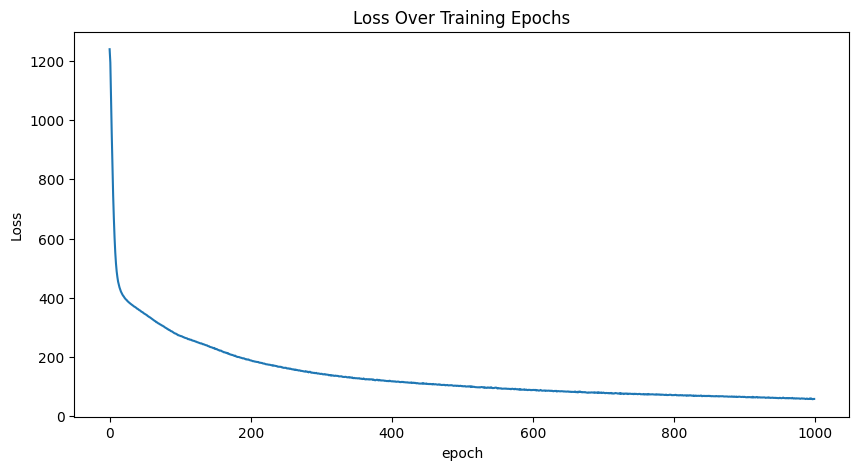

In [8]:
# PLOTTING THE LOSS OF TRAINING
fig  = plt.figure(figsize = (10,5))
plt.plot(loss_history)
plt.title("Loss Over Training Epochs")
plt.xlabel('epoch')
plt.ylabel('Loss')

Test Accuracy: 0.9682


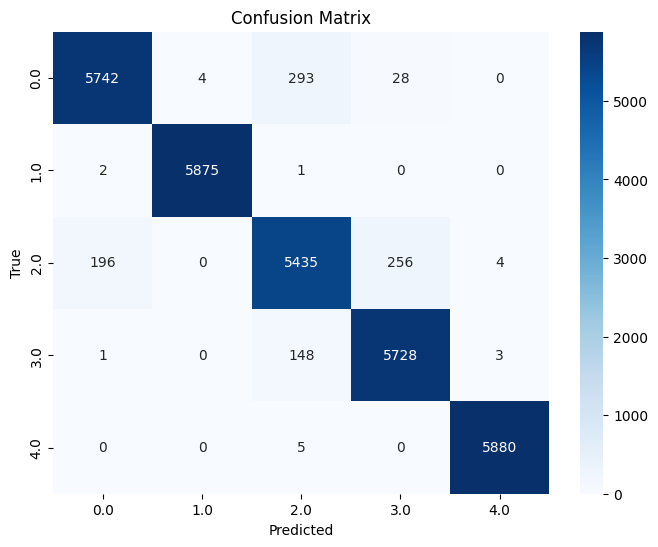

In [12]:

dbn.eval()
correct, total = 0, 0
predictions = []
true_labels = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        preds = dbn(x_batch)
        predicted = torch.argmax(preds, dim=1)
        predictions.extend(predicted.numpy())  # Collect predictions
        true_labels.extend(y_batch.numpy())    # Collect true labels
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

#Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


